# Topic Modeling With NMF and SVD using 20newsgroups dataset

### Importing the dependencies

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
np.set_printoptions(suppress=True)

# EDA

In [3]:
categories = ['alt.atheism','talk.religion.misc',
              'comp.graphics','sci.space']
remove = ('header','footers','quotes')
newsgroup_train = fetch_20newsgroups(subset='train',
                                     categories=categories,
                                    remove=remove)
newsgroup_train = fetch_20newsgroups(subset='test',
                                     categories=categories,
                                    remove=remove)

In [15]:
newsgroup_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
newsgroup_train.filenames.shape,newsgroup_train.target.shape

((1353,), (1353,))

In [6]:
print("\n".join(newsgroup_train.data[:3]))

From: prb@access.digex.net (Pat)
Subject: Re: Near Miss Asteroids (Q)
Organization: Express Access Online Communications, Greenbelt, MD USA
Lines: 4
Distribution: sci
NNTP-Posting-Host: access.digex.net


TRry the SKywatch project in  Arizona.
From: ing1023@ee.up.ac.za (ING1023)
Subject: Vatican library
Organization: Electrical and Computer Engineering, University of Pretoria
Lines: 8
NNTP-Posting-Host: mccartney.ee.up.ac.za



 The Vatican library recently made a tour of the US.
 Can anyone help me in finding a FTP site where this collection is 
 available.
From: Zheng Wang <zw10+@andrew.cmu.edu>
Subject: help
Organization: Sponsored account, Physics, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po2.andrew.cmu.edu

Hi there,

I am here looking for some help.

My friend is a interior decor designer. He is from Thailand. He is
trying to find some graphics software on PC. Any suggestion on which
software to buy,where to buy and how much it costs ? He likes the most
sophis

In [8]:
np.array(newsgroup_train.target_names)[newsgroup_train.target[:3]]

array(['sci.space', 'comp.graphics', 'comp.graphics'], dtype='<U18')

In [16]:
newsgroup_train.target[:10]

array([2, 1, 1, 1, 1, 1, 2, 2, 0, 2], dtype=int64)

In [18]:
num_topics,num_top_words = 6,8

# Data Preprocessing

In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [20]:
import nltk

In [24]:
vectorizer = CountVectorizer(stop_words='english')

In [25]:
vectors = vectorizer.fit_transform(newsgroup_train.data).todense()
vectors.shape

(1353, 23272)

In [32]:
print(len(newsgroup_train.data),vectors.shape)

1353 (1353, 23272)


In [34]:
vocab = np.array(vectorizer.get_feature_names())

In [35]:
vocab.shape

(23272,)

In [36]:
vocab[7000:7020]

array(['diamond', 'diana', 'diane', 'diaper', 'diaries', 'diary', 'dib',
       'dibs', 'dic5340', 'dicer', 'dichotomy', 'dick', 'dictated',
       'dictator', 'dictionary', 'dicussion', 'did', 'didier', 'didn',
       'didnt'], dtype='<U80')

# Singular Value Decomposition(SVD)

In [37]:
%time U,s,Vh = linalg.svd(vectors,full_matrices=False)

Wall time: 7 s


In [38]:
print(U.shape,s.shape,Vh.shape)

(1353, 1353) (1353,) (1353, 23272)


In [47]:
np.diag(s[:4])

array([[566.53570689,   0.        ,   0.        ,   0.        ],
       [  0.        , 380.50210454,   0.        ,   0.        ],
       [  0.        ,   0.        , 342.72923973,   0.        ],
       [  0.        ,   0.        ,   0.        , 258.26538452]])

### Singular values variation
* it tells the importance of the topic

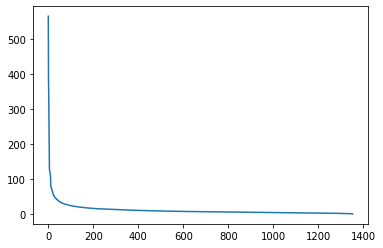

In [45]:
plt.plot(s)

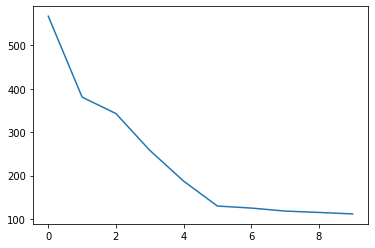

In [48]:
plt.plot(s[:10])

In [49]:
num_top_words=8

def show_topics(a):
    top_words = lambda t:[
        vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [50]:
show_topics(Vh[:10])

['n109 f118 permanet resorts gans edwin asuacad icend',
 'jpeg gif file image color quality format jfif',
 'edu graphics pub data ftp mail 128 ray',
 'edu graphics pub jehovah elohim mail lord ftp',
 'graphics jpeg edu pub mail ray send 128',
 'image spacecraft planet images processing graphics jehovah solar',
 'image larson universe theory gamma physical ray edu',
 'larson theory universe spacecraft physical sun material sgi',
 'gopher search edu siggraph available isbn client spacecraft',
 'gopher search pub client database larson software theory']

We get topics that match the kinds of clusters we would expect! This is despite the fact that this is an unsupervised algorithm - which is to say, we never actually told the algorithm how our documents are grouped.

# Non-negative Matrix Factorization(NMF)

In [63]:
m,n = vectors.shape
d = 5 #num topics

In [65]:
clf = decomposition.NMF(n_components=d,random_state=1)
W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [66]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'jehovah elohim lord god christ father mcconkie unto',
 'edu graphics pub mail ftp 128 ray send',
 'planet earth spacecraft venus solar surface space atmosphere',
 'image data available software processing edu ftp analysis']

## Topic Frequency-Inverse Document Frequency(TF-IDF)

In [69]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf=vectorizer_tfidf.fit_transform(newsgroup_train.data)

In [70]:
newsgroup_train.data[10:20]

["From: hotopp@ami1.bwi.wec.com (Daniel T. Hotopp)\nSubject: Drivers for Diamond Viper Card\nOrganization: Westinghouse Electronic Systems Group, Baltimore, MD.\nLines: 13\n\nI've been away for a couple of weeks and have become out of touch with the \nlatest information on the Diamond Viper Card.  Does anyone know if Diamond \nhas come out with any Vesa Driver updates lately?  Also, I was wondering \nwhat the latest Windows Driver version is up to now.\n\n\t\t\t\tThanks in advance,\n\t\t\t\t\tDan",
 'From: svec5@menudo.uh.edu (T.C. Zhao)\nSubject: Full Color Image Editor for SGI Workstations\nOrganization: University of Houston\nLines: 159\nDistribution: world\nNNTP-Posting-Host: menudo.uh.edu\n\n\n   I am happy to announce the first public release of the bit program,\n   an INTERACTIVE, FULL COLOR image viewer and editor based on SGI GL.\n   Besides typical touchup tasks, such as crop, rotate, smooth, etc,\n   bit offers some unique features not available in similar programs,\n   such

In [71]:
W1=clf.fit_transform(vectors_tfidf)
H1=clf.components_

In [73]:
show_topics(H1)

['god people don say think believe just christian',
 'sgi wpd solntze livesey com jon world distribution',
 'sandvik kent tourist cookamunga newton bureau apple cheers',
 'access digex net pat hst prb express online',
 'edu graphics image space university subject lines organization']

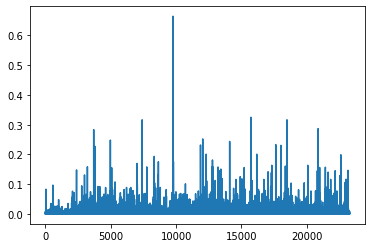

In [74]:
plt.plot(clf.components_[0])

In [81]:
clf.reconstruction_err_

35.87168984606751

# Truncated SVD

### Timing comprision

In [82]:
%time u,s,v=np.linalg.svd(vectors,full_matrices=False)

Wall time: 17.8 s


In [87]:
import fbpca

In [88]:
%time u,s,v=decomposition.randomized_svd(vectors,10)

Wall time: 5.94 s


In [89]:
%time u,s,v = fbpca.pca(vectors,10)

Wall time: 1.89 s
